# Task 2: Training.

The idea of this part is to train some different availables databases in order to study the stage of the training of a neuronal network augmentating the data, overfitting and regularizating the network by using different dropouts.

## MNIST database

Load and configure the needed modules.

In [ ]:
# Mnist 
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.layers.core import Activation
import matplotlib.pyplot as plt
# seed random
seed = 7
numpy.random.seed(seed)

### Load the MNIST data and normalizing

Load the MNIST data and normalizing the input images. It is needed to reshape the images into vectors and convert the pixel values to float numbers so that the values are between 0 and 1

In [ ]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Conversion of the pixel values to foat
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

# Normalizing inputs from 0 to 1
X_train = X_train / 255
X_test = X_test / 255
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_classes = Y_test.shape[1]

### Definition and building of the model

The first attempt is to try an architecture consisting of a single convolutional layer of 32 neurons and two fully connected layers with 128 neurons, one followed by a relu activation and another fully connected layer followed by a softmax activation.
There is an initial dropout of 0.2, that will be changed in the computation of the system to see the importance of the dropout presence and observing the behavior of the training depending on its value.

In [ ]:
def baseline_model():
	# Definition of the model
	model = Sequential()
	model.add(Convolution2D(32, 5, 5, border_mode='valid', input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile the model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# Building the model
model = baseline_model()

### Checkpoint and fit

Saving checkpoint. Saves the model weights after each epoch if the validation loss decreased.

In [ ]:
#Saving checkpoint
model.save_weights('test.hdf5')
# Fit 
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath="savings_e{epoch}.hdf5", verbose=1)
history = model.fit(X_train, Y_train, batch_size=128, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test), callbacks=[checkpointer])

### Evaluation 

In [ ]:
# Evaluation of the model
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
plt.subplot(2, 1, 1)
plt.title('Loss')
plt.xlabel('Epoch')
plt.plot(history.history['loss'], '-o', label='Training loss')
plt.plot(history.history['val_loss'], '-o', label='Validation loss')
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.plot(history.history['acc'], '-o', label='Training accuracy')
plt.plot(history.history['val_acc'], '-o', label='Validation accuracy')
plt.legend(loc='lower right')
plt.show()

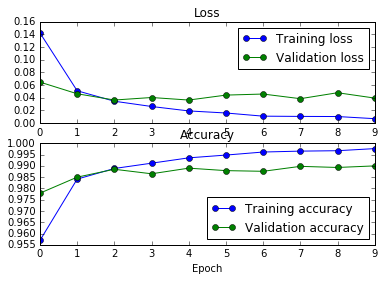

In [1]:
from IPython.display import Image
PATH = "plots/"
Image(filename = PATH + "Mnist_Dropout02.png", width=350, height=350)

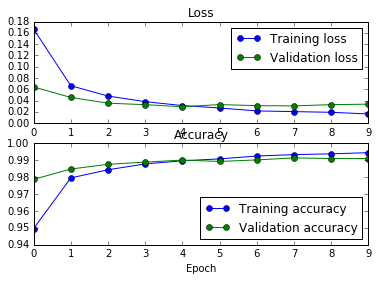

In [2]:
from IPython.display import Image
PATH = "plots/"
Image(filename = PATH + "Mnist_Dropout09.png", width=350, height=350)

## CIFAR10 database

Once the needed modules are loaded and configured, we are ready to try the system with the CIFAR10 database

In [ ]:
from keras.datasets import cifar10
from keras.constraints import maxnorm
from keras.optimizers import SGD
seed = 7
numpy.random.seed(seed)

### Load the CIFAR10 database and normalize

Load the CIFAR10 data and normalizing the input images. It is needed to reshape the images into vectors and convert the pixel values to float numbers so that the values are between 0 and 1

In [ ]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# one hot encode outputs
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_test.shape[1]

### Definition, creation and compilation of the model

The following attempt is to try an architecture consisting of a single convolutional layer of 32 neurons and two fully connected layers with 512 neurons, one followed by a relu activation and another fully connected layer followed by a softmax activation. There is an initial dropout of 0.2 and 0.5, that will be changed in the computation of the system to see the importance of the dropout presence and observing the behavior of the training depending on its value.

In [ ]:
# model creation
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(3, 32, 32), border_mode='same', activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.5)) # Dropout de 20%
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
# compilar modelo
epochs = 5 
lrate = 0.1
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

### Checkpoint and fit

In [ ]:
model.save_weights('test.hdf5')
# Fit 
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath="savings_e{epoch}.hdf5", verbose=1)
history = model.fit(X_train, Y_train, batch_size=128, nb_epoch=5, verbose=1, validation_data=(X_test, Y_test), callbacks=[checkpointer])

### Evaluation

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, Y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

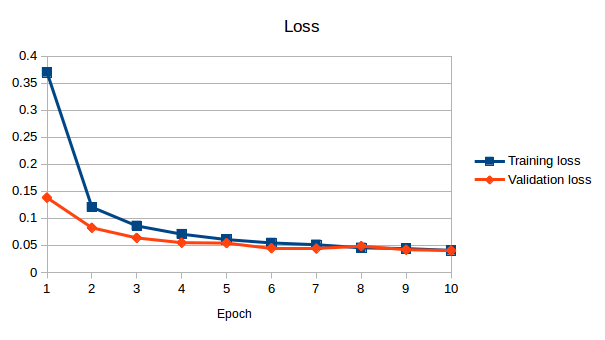

In [12]:
# Plot the Loss
from IPython.display import Image
PATH = "plots/"
Image(filename = PATH + "CIFAR10_l.png", width=350, height=350)

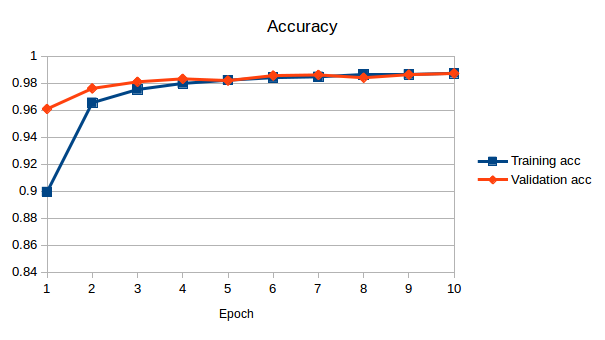

In [13]:
# Plot the Accuracy
from IPython.display import Image
PATH = "plots/"
Image(filename = PATH + "CIFAR10_a.png", width=350, height=350)